<a href="https://colab.research.google.com/github/YZCUS/Amazon-recommender/blob/main/feature_based_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [2]:
import pandas as pd
from datasets import load_dataset

In [3]:
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Amazon_Fashion", split="full", trust_remote_code=True)
print(dataset[0])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating full split: 0 examples [00:00, ? examples/s]

{'main_category': 'AMAZON FASHION', 'title': "YUEDGE 5 Pairs Men's Moisture Control Cushioned Dry Fit Casual Athletic Crew Socks for Men (Blue, Size 9-12)", 'average_rating': 4.6, 'rating_number': 16, 'features': [], 'description': [], 'price': 'None', 'images': {'hi_res': ['https://m.media-amazon.com/images/I/81XlFXImFrS._AC_UL1500_.jpg', 'https://m.media-amazon.com/images/I/61+yVkHHQ3S._AC_UL1200_.jpg', 'https://m.media-amazon.com/images/I/61vbh6sLR1L._AC_UL1200_.jpg', 'https://m.media-amazon.com/images/I/71tRVQuan7S._AC_UL1500_.jpg', 'https://m.media-amazon.com/images/I/81BvTztKWGL._AC_UL1200_.jpg', 'https://m.media-amazon.com/images/I/71LytMHW9ML._AC_UL1200_.jpg', 'https://m.media-amazon.com/images/I/71wJKMbj5cS._AC_UL1500_.jpg'], 'large': ['https://m.media-amazon.com/images/I/41+cCfaVOFS._AC_.jpg', 'https://m.media-amazon.com/images/I/41jBdP7etRS._AC_.jpg', 'https://m.media-amazon.com/images/I/41UGJiRe7UL._AC_.jpg', 'https://m.media-amazon.com/images/I/41zb4GR-lWS._AC_.jpg', 'http

In [4]:
dataset.features

{'main_category': Value(dtype='string', id=None),
 'title': Value(dtype='string', id=None),
 'average_rating': Value(dtype='float64', id=None),
 'rating_number': Value(dtype='int64', id=None),
 'features': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'description': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'price': Value(dtype='string', id=None),
 'images': Sequence(feature={'hi_res': Value(dtype='string', id=None), 'large': Value(dtype='string', id=None), 'thumb': Value(dtype='string', id=None), 'variant': Value(dtype='string', id=None)}, length=-1, id=None),
 'videos': Sequence(feature={'title': Value(dtype='string', id=None), 'url': Value(dtype='string', id=None), 'user_id': Value(dtype='string', id=None)}, length=-1, id=None),
 'store': Value(dtype='string', id=None),
 'categories': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'details': Value(dtype='string', id=None),
 'parent_asin': Value(dtype='stri

In [5]:
dataset.remove_columns(['images','videos','bought_together','subtitle','author'])

Dataset({
    features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'store', 'categories', 'details', 'parent_asin'],
    num_rows: 826108
})

In [6]:
flat_dataset = dataset.remove_columns(['main_category','images','videos','bought_together','subtitle','author']).flatten()

In [7]:
flat_dataset

Dataset({
    features: ['title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'store', 'categories', 'details', 'parent_asin'],
    num_rows: 826108
})

In [8]:
filtered_dataset = flat_dataset.filter(lambda df:(df['features']!=[] and df['price']!=None and df['average_rating']>=4.5 and df['rating_number']>=50))

Filter:   0%|          | 0/826108 [00:00<?, ? examples/s]

In [9]:
len(filtered_dataset)

7103

In [10]:
df = pd.DataFrame(filtered_dataset)

In [11]:
df

,title,average_rating,rating_number,features,description,price,store,categories,details,parent_asin
0,Hendevl 100G Mixed Antiqued Charms Clock Face ...,4.5,90,[Package included: 100g mixed antiqued charms ...,[],8.69,Hendevl,[],"{""Package Dimensions"": ""5.67 x 4.02 x 0.43 inc...",B07QL59SXQ
1,12pcs Mickey and Minnie Inspired Headband Ears...,4.7,201,"[12 PC, one size fits all age, SATISFACTION GU...",[],16.99,CLGIFT,[],"{""Is Discontinued By Manufacturer"": ""No"", ""Pro...",B01BZ0ELIU
2,icyzone Workout Tank Tops for Women - Running ...,4.5,6074,"[70% Polyester, 30% Rayon, Imported, Pull On c...",[],14.99,icyzone,[],"{""Package Dimensions"": ""8.6 x 7.8 x 0.4 inches...",B07S8KMCQW
3,CRZ YOGA Women's Long Sleeves Workout Shirts Q...,4.5,159,"[Brushed Feeling Fabric: 88% Polyester, 12% El...",[],18.2,CRZ YOGA,[],"{""Department"": ""Womens"", ""Date First Available...",B08PFYDC1J
4,Lace Dangling Oval Photo Wedding Bouquet Charm...,4.7,220,[Memorial photo charm with dangling pearly gua...,[This special memorial charm with pin lets you...,11.99,Photojewelrymaking,[],"{""Is Discontinued By Manufacturer"": ""No"", ""Pac...",B079Q4JZHH
...,...,...,...,...,...,...,...,...,...,...
7098,Transformers Decepticons Megatron And Symbol 8...,4.8,100,[TRANSFORMERS - The Decepticons have arrived! ...,[Transformers Decepticons Officially licensed ...,12.95,Transformers,[],"{""Package Dimensions"": ""2.91 x 2.09 x 0.71 inc...",B092W9VPN1
7099,Men Argyle Vintage 70s 80s Turtleneck Sweater ...,4.5,803,"[Pull On closure, Hand Wash Only]",[],None,PJ PAUL JONES,[],"{""Package Dimensions"": ""14.21 x 10.55 x 2.05 i...",B0B7MWYCTW
7100,Yoille Girls Mermaid Swimsuits One Piece Bathi...,4.5,154,"[Polyamide,Elastane, Pull On closure]",[Happy Wear & Have Sun Fun Girls Mermaid Swims...,None,Yoille,[],"{""Package Dimensions"": ""9.13 x 6.46 x 1.18 inc...",B08X6SVQLR
7101,THE NORTH FACE Women's Half Dome Pullover Hood...,4.7,202,"[100% Polyester, Imported, Pull On closure, Ma...","[Stay laid-back and relaxed, wherever the adve...",41.37,THE NORTH FACE,[],"{""Item Weight"": ""1 Pounds"", ""Department"": ""Wom...",B09BD8DFK1


In [12]:
df1 = df.groupby('average_rating',as_index=False).count()

In [13]:
df1

,average_rating,title,rating_number,features,description,price,store,categories,details,parent_asin
0,4.5,2719,2719,2719,2719,2719,2713,2719,2719,2719
1,4.6,2253,2253,2253,2253,2253,2249,2253,2253,2253
2,4.7,1392,1392,1392,1392,1392,1391,1392,1392,1392
3,4.8,611,611,611,611,611,608,611,611,611
4,4.9,119,119,119,119,119,119,119,119,119
5,5.0,9,9,9,9,9,9,9,9,9


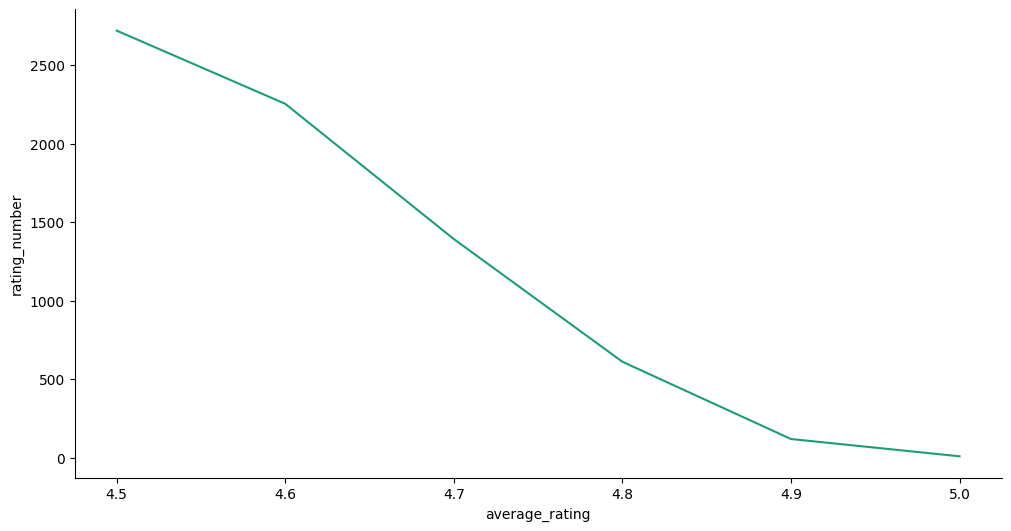

In [14]:
# @title average_rating vs rating_number

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['average_rating']
  ys = series['rating_number']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('average_rating', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('average_rating')
_ = plt.ylabel('rating_number')

In [15]:
df.columns

Index(['title', 'average_rating', 'rating_number', 'features', 'description',
       'price', 'store', 'categories', 'details', 'parent_asin'],
      dtype='object')

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
titles = df['title'].tolist()
features = df['features'].str.join(" ")
features = features.str.split(" ").tolist()

In [18]:
titles

['Hendevl 100G Mixed Antiqued Charms Clock Face Charm Pendant for DIY Crafts, Gears, Jewelry Making, Steampunk Pendants',
 '12pcs Mickey and Minnie Inspired Headband Ears Birthday Party Favors',
 'icyzone Workout Tank Tops for Women - Running Muscle Tank Sport Exercise Gym Yoga Tops Athletic Shirts',
 "CRZ YOGA Women's Long Sleeves Workout Shirts Quick Dry Running Clothes Mesh Back Athletic Yoga Tops Loose Fit",
 'Lace Dangling Oval Photo Wedding Bouquet Charm with Guardian Angel',
 "Tee Luv Men's Faded Boss 302 Ford Mustang Shirt",
 'Women Wife Mom Boss T Shirt Women Funny Short Sleeve Top (XX-Large, Black)',
 'BLEOUK A Court of Thorns and Roses Inspired Keychain Velaris Gift ACOMAF Night Court Gift',
 "NELEUS Women's 3 Pack Athletic Compression Long Sleeve T Shirt Dry Fit",
 'Ruifan 20G Mix Color Stainless Steel Ball Clear CZ Stud Earrings for Men Women Round 3-8mm 6-12Pairs',
 'Dapper&Doll Kids Apron and Chef Hat Gift Set - Toddler & Kid Sizes - Super Cute & Fun',
 'Pazzle Women Pee

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def create_bags_of_words(features_list):
    bags_of_words = {}
    for feature in features_list:
        if feature.lower() not in stop_words:
            bags_of_words[feature] = 1
    return bags_of_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
bags_of_words = [create_bags_of_words(features_list) for features_list in features]

In [21]:
bags_of_words

[{'Package': 1,
  'included:': 1,
  '100g': 1,
  'mixed': 1,
  'antiqued': 1,
  'charms': 1,
  'clock': 1,
  'face': 1,
  'Material:': 1,
  'Zinc': 1,
  'Alloy.': 1,
  'Pendants': 1,
  'Charms': 1,
  'Size:1-5cm.': 1,
  'Useful': 1,
  ':Jewelry': 1,
  'Making,Jewelry': 1,
  'DIY,Charms,pendant.': 1,
  'Note:The': 1,
  'spacers': 1,
  'beads': 1,
  'sold': 1,
  '"GRAM",': 1,
  '（quantity': 1,
  'may': 1,
  'vary': 1,
  'due': 1,
  'different': 1,
  'sized': 1,
  'weight': 1,
  '100': 1,
  'gram）': 1},
 {'12': 1,
  'PC': 1,
  'one': 1,
  'size': 1,
  'fits': 1,
  'age': 1,
  'SATISFACTION': 1,
  'GUARANTEED': 1},
 {'70%': 1,
  'Polyester,': 1,
  '30%': 1,
  'Rayon': 1,
  'Imported': 1,
  'Pull': 1,
  'closure': 1,
  '√': 1,
  'exaggerated': 1,
  'armhole': 1,
  'design': 1,
  'lets': 1,
  'tank': 1,
  'hang': 1,
  'loosely': 1,
  'relaxed': 1,
  'feel': 1,
  'Racerback': 1,
  'style': 1,
  'bound': 1,
  'edges': 1,
  'flatlock': 1,
  'seams': 1,
  'Flat': 1,
  'lock': 1,
  'stitch': 1,
 

In [22]:
feature_df = pd.DataFrame(bags_of_words, index=titles).fillna(0)

In [23]:
cosine_similarity = cosine_similarity(feature_df)

In [24]:
similarity_df = pd.DataFrame(cosine_similarity, index=feature_df.index, columns=feature_df.index)

In [32]:
product = input('Enter a product you like:')

Enter a product you like:Heathen Thor Tank


In [33]:
product_index = similarity_df.index.get_loc(product)

In [34]:
top_5 = similarity_df.iloc[product_index].sort_values(ascending=False)[1:6]

In [35]:
top_5

San Francisco Football Fans. Jimmy G is His Name, QB is His Game. Red T-Shirt (Sm-5X) (Short Sleeve    0.774597
Fila Men's Big and Tall Short Sleeve T Shirt Big & Tall Crewneck Men Shirt                             0.774597
Champion Notre Dame Fighting Irish Adult Play Like a T-Shirt - Navy, Large                             0.774597
2nd Birthday Shirt for Boy 2 Year Old Boy Birthday Gift Toddler Two Shirt 24M Green                    0.774597
Ripple Junction Men’s Playstation Logo Long-Sleeve Shirt with Japanese Characters, Black               0.774597
Name: Heathen Thor Tank, dtype: float64